# Module 19 - Final Challenge

1. Load the houseprices data from Thinkful's database.
2. Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.
3. Now, split your data into train and test sets where 20% of the data resides in the test set.
4. Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!
5. Evaluate your best model on the test set.

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from IPython.display import Image
import pydotplus

In [2]:
# import dataset
df = pd.read_csv(r'C:\Users\AP\Downloads\house prices.csv')

# -----DATA CLEAN CONDENSED FROM PREVIOUS WORK ON SAME DATASET-----

# columns to lower case
df.columns = map(str.lower, df.columns)

# create numerical column variable
num_col = df.select_dtypes(['int64', 'float64']).columns

# create alpha column variable
alpha_col = df.select_dtypes(['object']).columns

# convert alpha columns to binary
df['mszoning'] = pd.get_dummies(df.mszoning, drop_first=True)
df['neighborhood'] = pd.get_dummies(df.neighborhood, drop_first=True)
df['exterior1st'] = pd.get_dummies(df.exterior1st, drop_first=True)

# create interaction variable between basement, first, second floor sq ft
df['totalsf'] = df.totalbsmtsf + df['1stflrsf'] + df['2ndflrsf']

# create interaction variable between total sq ft and overall quality
df['int_over_sf'] = df.totalsf * df.overallqual

alphas = [100,1]

Train observations: 1168
Test observations:  292


c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


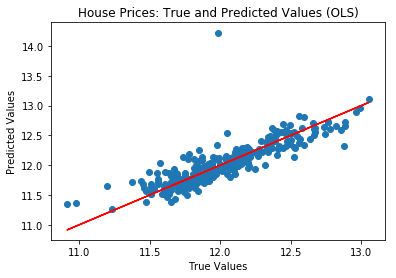

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     757.7
Date:                Sat, 09 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:49:42   Log-Likelihood:                 391.94
No. Observations:                1168   AIC:                            -767.9
Df Residuals:                    1160   BIC:                            -727.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.3793      0.060    173.479      0.000      10.262      10.497
overallqual      0.1429      0.010     14.145      0.000       0.123       0.163
grlivarea     3.066e-05   2.04e-05      1.503      0.133   -9.38e-06    7.07e-05
garagecars       0.1049      0.009     11.674      0.000       0.087       0.122
mszoning         0.0568      0.025      2.248      0.025       0.007       0.106
neighborhood    -0.0992      0.123     -0.806      0.420      -0.341       0.142
exterior1st  -3.351e-16   3.58e-16     -0.935      0.350   -1.04e-15    3.68e-16
int_over_sf  -1.068e-05   3.36e-06     -3.179      0.002   -1.73e-05   -4.09e-06
totalsf          0.0003    2.7e-05     10.319      0.000       0.000       0.000
==============================================================================
Omnibus:                      453.805   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3353.417
Skew:                          -1.607   Prob(JB):                         0.00
Kurtosis:                      10.653   Cond. No.                     8.56e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.55e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [3]:
# OLS

# target variable(log-transformed) and feature set
Y = np.log1p(df.saleprice)
X = df[['overallqual', 
        'grlivarea', 
        'garagecars', 
        'mszoning', 
        'neighborhood', 
        'exterior1st', 
        'int_over_sf', 
        'totalsf'
        ]]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# print train and test shape
print('Train observations: {}'.format(X_train.shape[0]))
print('Test observations:  {}'.format(X_test.shape[0]))

# add constants
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# fit model
results = sm.OLS(y_train, X_train).fit()

# predict
y_preds = results.predict(X_test)

# scatterplot true vs predicted values
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('House Prices: True and Predicted Values (OLS)')
plt.show()

# summary results
results.summary()

#### Observations
- The model achieved an R-squared and adjusted R-squared accuracy score of 82%
- There is one strange outlier where the model predicted an extremely high house price, but the true value is much lower
- There are only three variables (overallqual, grlivarea, garagecars) with coefficient scores noticeably above zero. The p-values of these three variables are all zero, which indicates they are normally distributed.
- The rest of the variables had coefficient scores of zero, which means they have essentially no effect on the target variable. Or they had high p-values, which indicates their distributions are not normally distributed.
- However, when tinkering with the model I tried removing the underperforming features, but the model performed worse than the current iteration.
- We will keep all the current features for use in models

Train observations: 1168
Test observations:  292


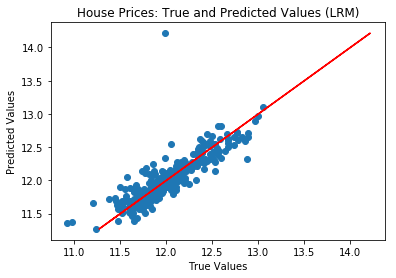

R-squared train set: 0.8205382119492894

-----Test set statistics-----

R-squared test set:  0.6844945995520325
MAE:                 0.127014212340495
MSE:                 0.04108646058936128
RMSE:                0.20269795408282068
MAPE:                1.059740004572927


In [6]:
# linear regression

# target variable(log-transformed) and feature set
Y = np.log1p(df.saleprice)
X = df[['overallqual', 
        'grlivarea', 
        'garagecars', 
        'mszoning', 
        'neighborhood', 
        'exterior1st', 
        'int_over_sf', 
        'totalsf'
        ]]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# print train and test shape
print('Train observations: {}'.format(X_train.shape[0]))
print('Test observations:  {}'.format(X_test.shape[0]))

# fit model
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# predict
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

# scatterplot true vs predicted values
plt.scatter(y_test, y_preds_test)
plt.plot(y_preds_test, y_preds_test, color='r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('House Prices: True and Predicted Values (LRM)')
plt.show()

# print summary statistics
print('R-squared train set: {}'.format(lrm.score(X_train, y_train)))
print("")
print('-----Test set statistics-----')
print("")
print('R-squared test set:  {}'.format(lrm.score(X_test, y_test)))
print('MAE:                 {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('MSE:                 {}'.format(mse(y_test, y_preds_test)))
print('RMSE:                {}'.format(rmse(y_test, y_preds_test)))
print('MAPE:                {}'.format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

#### Observations
- Train set R-squared is 82%, same as the OLS model
- Again, that same outlier is present 
- Test set adjusted R-squared is 68.5%, underperforming the previous OLS model
- MAE, MSE, RMSE, and MAPE scores are all low

In [7]:
# lasso CV

# target variable(log-transformed) and feature set
Y = np.log1p(df.saleprice)
X = df[['overallqual', 
        'grlivarea', 
        'garagecars', 
        'totalsf', 
        'int_over_sf'
        ]]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

# print train and test shape
print('Train observations: {}'.format(X_train.shape[0]))
print('Test observations:  {}'.format(X_test.shape[0]))
print('')

# fit model
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# predict
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

# print summary statistics
print('Best alpha value:    {}'.format(lasso_cv.alpha_))
print('R-squared train set: {}'.format(lasso_cv.score(X_train, y_train)))
print("")
print('-----Test set statistics-----')
print("")
print('R-squared test set:  {}'.format(lasso_cv.score(X_test, y_test)))
print('MAE:                 {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('MSE:                 {}'.format(mse(y_test, y_preds_test)))
print('RMSE:                {}'.format(rmse(y_test, y_preds_test)))
print('MAPE:                {}'.format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Train observations: 1168
Test observations:  292

Best alpha value:    100
R-squared train set: 0.6541252776377666

-----Test set statistics-----

R-squared test set:  0.7730559215066828
MAE:                 0.14257142472924594
MSE:                 0.03646457898517961
RMSE:                0.1909570082117428
MAPE:                1.190066466230031


#### Observations
- Train set R-squared is 65.5%, the worst performing train set so far
- Test set adjusted R-squared increased to 77%, making it the second best performer behind OLS
- MAE, MSE, RMSE, and MAPE scores are again all low

In [8]:
# ridge CV

# target variable(log-transformed) and feature set
Y = np.log1p(df.saleprice)
X = df[['overallqual', 
        'grlivarea', 
        'garagecars', 
        'mszoning', 
        'neighborhood', 
        'exterior1st', 
        'int_over_sf', 
        'totalsf'
        ]]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

# print train and test shape
print("Train observations: {}".format(X_train.shape[0]))
print("Test observations:  {}".format(X_test.shape[0]))
print('')

# fit model
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# predict
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

# print summary statistics
print('Best alpha value:    {}'.format(ridge_cv.alpha_))
print('R-squared train set: {}'.format(ridge_cv.score(X_train, y_train)))
print("")
print('-----Test set statistics-----')
print("")
print('R-squared test set:  {}'.format(ridge_cv.score(X_test, y_test)))
print('MAE:                 {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('MSE:                 {}'.format(mse(y_test, y_preds_test)))
print('RMSE:                {}'.format(rmse(y_test, y_preds_test)))
print('MAPE:                {}'.format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Train observations: 1168
Test observations:  292

Best alpha value:    1
R-squared train set: 0.8051743657463653

-----Test set statistics-----

R-squared test set:  0.7981161696749339
MAE:                 0.13319109180727418
MSE:                 0.03243798615761526
RMSE:                0.18010548619521635
MAPE:                1.1101629706136893


#### Observations
- Train set R-squared is 80.5%, making it a middle-of-the-pack performer for train set
- Test set adjusted R-squared is 80%, making the second best performer behind OLS
- MAE, MSE, RMSE, and MAPE scores are again all low

In [9]:
# elasticnet CV

# target variable(log-transformed) and feature set
Y = np.log1p(df.saleprice)
X = df[['overallqual', 
        'grlivarea', 
        'garagecars', 
        'mszoning', 
        'neighborhood', 
        'exterior1st', 
        'int_over_sf', 
        'totalsf'
        ]]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

# print train and test shape
print("Train observations: {}".format(X_train.shape[0]))
print("Test observations:  d{}".format(X_test.shape[0]))
print('')

# fit model
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)
elasticnet_cv.fit(X_train, y_train)

# predict
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

# print summary statistics
print('Best alpha value:    {}'.format(elasticnet_cv.alpha_))
print('R-squared train set: {}'.format(elasticnet_cv.score(X_train, y_train)))
print("")
print('            ----- Test set statistics -----')
print("")
print('R-squared test set:  {}'.format(elasticnet_cv.score(X_test, y_test)))
print('MAE:                 {}'.format(mean_absolute_error(y_test, y_preds_test)))
print('MSE:                 {}'.format(mse(y_test, y_preds_test)))
print('RMSE:                {}'.format(rmse(y_test, y_preds_test)))
print('MAPE:                {}'.format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Train observations: 1168
Test observations:  d292

Best alpha value:    100
R-squared train set: 0.6547543822663481

            ----- Test set statistics -----

R-squared test set:  0.7759594346029726
MAE:                 0.1416077552719938
MSE:                 0.03599805267906462
RMSE:                0.18973152789946277
MAPE:                1.18201283827753


#### Observations
- Train set R-squared is 65.5%
- Test set adjusted R-squared is 77.5%, making it a mediocre performer
- MAE, MSE, RMSE, and MAPE scores are all low

## Summary Results
- Top performers
    > - OLS  
        > ~ Train:   82.1 %  
        > ~ Test:    81.9 %  
        > ~ Most accurate train and test score, best performer of all
        
    > - Ridge CV  
        > ~ Train:   80.51 %  
        > ~ Test:    79.81 %  
        > ~ Close 2nd place behind OLS
        
- Bottom performers
    > - Linear Regression  
        > ~ Train:   82.05 %  
        > ~ Test:    68.45 %  
        > ~ Inline with OLS and Ridge train scores, but test accuracy dropped significantly  
        > ~ Suggests overfitting
        
    > - Lasso CV  
        > ~ Train:   65.41 %  
        > ~ Test:    77.31 %  
        > ~ Better test score than train score surprisingly, but both accuracies on the low side
        
    > - Elasticnet CV  
        > ~ Train:   65.48 %  
        > ~ Test:    77.6 %  
        > ~ Similar to lasso, better test score than train score, but both accuracies on the low side